### Loading Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading and Exploring Dataset

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
library = pd.read_csv('Seattle Library James Patterson Book Checkouts.csv')
library.head()

,Material Type,Title,Series,Checkout Year,Checkout Month,Checkouts,Subjects,Publisher,Publication Year
0,BOOK,#1 Suspect,NaN,2019,8,1,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
1,BOOK,#1 Suspect,NaN,2019,6,1,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
2,BOOK,#1 Suspect,NaN,2019,6,2,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
3,BOOK,#1 Suspect,NaN,2019,5,1,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
4,BOOK,#1 Suspect,NaN,2019,5,2,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012


In [3]:
library.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Material Type     17918 non-null  object
 1   Title             17918 non-null  object
 2   Series            12539 non-null  object
 3   Checkout Year     17918 non-null  int64 
 4   Checkout Month    17918 non-null  int64 
 5   Checkouts         17918 non-null  int64 
 6   Subjects          17918 non-null  object
 7   Publisher         17918 non-null  object
 8   Publication Year  17918 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


In [4]:
library.columns

Index(['Material Type', 'Title', 'Series', 'Checkout Year', 'Checkout Month',
       'Checkouts', 'Subjects', 'Publisher', 'Publication Year'],
      dtype='object')

In [5]:
library['Material Type'].value_counts()

Material Type
BOOK          17857
LARGEPRINT       35
REGPRINT         26
Name: count, dtype: int64

In [6]:
library['Series'].value_counts()

Series
Alex Cross             2351
Women's Murder Club    2278
Maximum Ride           2048
Middle School          1524
Michael Bennett        1153
Private                 983
Daniel X                630
Witch & Wizard          584
NYPD Red                398
Confessions             353
Invisible               120
Harriet Blue             88
Crazy House              29
Name: count, dtype: int64

In [7]:
library['Series'].isnull().sum()

5379

In [8]:
library['Subjects'].iloc[0]

'Private investigators California Fiction, Private security services California Fiction, Large type books, Mystery fiction'

In [9]:
library.duplicated().sum()

9

### Data Summery

* The Data set contains `17918` records with `Nine` Columns.
* There are 3 Material types of books, `Book` `Large Print` `Regular Print`.
* There are 13 different book `Series` and `5379` `NaN values` that we will replace with `Undefined` instead.
* The `Subjects` column has a lot of details, so we will use the first record as the main `Subject`.
* The `Puplisher` records end with a comma, so we will delete it.
* Some `puplishers` have various names, we will use only one name to describe them. 
* The `Publication Year` column is of inconsistent data type that needs to be converted to `int` type.
* There are `9` `Duplicated` records in the data set that need to be droppped.

### Data Cleaning

In [10]:
# Drop duplicates

library.drop_duplicates(inplace=True)

In [11]:
# Filling "NaN" values

library['Series'].fillna('Undefined', inplace=True)
library['Series'].isnull().sum()

0

In [12]:
# Cleaning "Publication Year" Column and converting it into "int" data type

library['Publication Year'].value_counts()

Publication Year
2012              1860
2011              1610
2009              1487
2014              1367
2010              1189
2013              1166
2015              1102
2016              1099
2008              1019
2007               972
2017               912
2006               385
2005               369
2018               362
c2010.             295
2001               273
c2004.             225
c2001.             193
1999               191
[2003]             118
c2002.             107
[2013]              97
2003                90
c1996.              87
2000, c1995.        82
c2009.              82
c2011.              80
2019                80
2002                70
2000                66
2011, c2010.        60
[2014]              58
[2018]              56
2009, c2005.        50
c2000.              45
2012, c2011.        44
[2017]              44
2009, c2007.        43
2007, c2005.        41
[2005], ©2004.      40
2007, 2006.         40
2008, c2007.        40
C2016.           

In [13]:
library['Publication Year'] = library['Publication Year'].apply(lambda x: x.split(',')[0])

In [14]:
library['Publication Year'] = library['Publication Year'].str.replace('\D','', regex=True)

In [15]:
library['Publication Year'].value_counts()

Publication Year
2012    1932
2011    1792
2009    1683
2010    1528
2014    1425
2013    1263
2016    1133
2015    1102
2008    1078
2007    1053
2017     956
2001     468
2005     447
2018     418
2006     398
2004     252
2003     226
2000     195
1999     191
2002     177
2019      87
1996      87
1998      18
Name: count, dtype: int64

In [16]:
library['Publication Year'] = library['Publication Year'].astype('int64')

In [17]:
library['Publication Year'].isnull().sum()

0

In [18]:
# Cleaning "Subjects" column / selecting the first subject in the records as the main subject.

library['Subjects'] = library['Subjects'].apply(lambda x: x.split(',')[0])

In [19]:
# Cleaning "Publisher" column / Removing the comma in the end.

library['Publisher'] = library['Publisher'].str.replace(',','')

In [20]:
library['Publisher'].value_counts()

Publisher
Little Brown and Co.                                5033
Little Brown and Company                            4793
Little Brown                                        3230
Yen Press                                           1046
Grand Central Publishing                             635
Grand Central Pub.                                   383
Little Brown & Co.                                   307
Vision                                               300
BookShots Little Brown and Company                   292
Little Brown & Company                               216
G.K. Hall                                            168
Little Brown and Company Large Print                 158
Little Brown and Co. Large Print                     144
BookShots/Little Brown and Company                   121
Thorndike Press                                      106
JIMMY Patterson Books Little Brown and Company        93
IDW Pub.                                              67
Little Brown Large Pr

In [21]:
# Renaming "Publisher" values to reduce redundancy and duplications.

library['Publisher'] = library['Publisher'].replace(['Little Brown and Co. ;','Little Brown & Company','Little Brown & Co','Little Brown','Little Brown and Company','Little Brown and Co.'],'Little Brown & Co.')
library['Publisher'] = library['Publisher'].replace(['BookShots Little Brown and Company','BookShots/Little Brown and Company','Book Shots/Little Brown & Company','Bookshots / Little Brown and Company','Bookshots Little Brown and Company'],'Bookshots / Little Brown & Co.')
library['Publisher'] = library['Publisher'].replace(['Little Brown and Company Large Print','Little Brown and Co. Large Print','Little Brown Large Print'],'Little Brown & Co. Large Print')
library['Publisher'] = library['Publisher'].replace(['Jimmy Patterson Little Brown and Company','Jimmy Patterson Books Little Brown and Company','Jimmy Patterson Books / Little Brown and Company','Jimmy Patterson Books/Little Brown and Company','JIMMY Patterson Books Little Brown and Company'],'JIMMY Patterson Books / Little Brown & Co.')
library['Publisher'] = library['Publisher'].replace(['Grand Central Publishing','Grand Central Pub.'],'Grand Central')
library['Publisher'] = library['Publisher'].replace(['Grand Central Publishing/Hachette','Grand Central Publishing/Hachette Book Group'],'Grand Central / Hachette')
library['Publisher'] = library['Publisher'].replace(['Grand Central Publishing Large Print'],'Grand Central Large Print')

In [22]:
library['Publisher'].value_counts()

Publisher
Little Brown & Co.                                  13681
Yen Press                                            1046
Grand Central                                        1018
Bookshots / Little Brown & Co.                        482
Little Brown & Co. Large Print                        366
Vision                                                300
G.K. Hall                                             168
JIMMY Patterson Books / Little Brown & Co.            151
Thorndike Press                                       106
IDW Pub.                                               67
BookShots                                              60
Idea & Design Works LLC                                60
Random House Large Print                               59
Wheeler Pub.                                           47
Thorndike Press ; Chivers Press                        40
Grand Central / Hachette                               37
Nhà xuất bản Văn hóa                                   35
Back

In [23]:
library.head()

,Material Type,Title,Series,Checkout Year,Checkout Month,Checkouts,Subjects,Publisher,Publication Year
0,BOOK,#1 Suspect,Undefined,2019,8,1,Private investigators California Fiction,Little Brown & Co.,2012
1,BOOK,#1 Suspect,Undefined,2019,6,1,Private investigators California Fiction,Little Brown & Co.,2012
2,BOOK,#1 Suspect,Undefined,2019,6,2,Private investigators California Fiction,Little Brown & Co.,2012
3,BOOK,#1 Suspect,Undefined,2019,5,1,Private investigators California Fiction,Little Brown & Co.,2012
4,BOOK,#1 Suspect,Undefined,2019,5,2,Private investigators California Fiction,Little Brown & Co.,2012


In [24]:
library.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17909 entries, 0 to 17917
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Material Type     17909 non-null  object
 1   Title             17909 non-null  object
 2   Series            17909 non-null  object
 3   Checkout Year     17909 non-null  int64 
 4   Checkout Month    17909 non-null  int64 
 5   Checkouts         17909 non-null  int64 
 6   Subjects          17909 non-null  object
 7   Publisher         17909 non-null  object
 8   Publication Year  17909 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.4+ MB


* Our Data is now clean and ready for further analysis and investigation.
* We will save our Data first as a CSV file.

In [25]:
library.to_csv('library.csv', index=False)

### Data Analysis

In this section we will try to answer the following Questions;

* ##### Q1: Is there a seasonality month and if there is any, which month?
* ##### Q2: What is the most checked out subject throughout the years?
* ##### Q4: What are the top 10 books that have been checked out?
* ##### Q3: What is the most checked out publication year?



*****

#### 1. Is there a seasonality month and if there is any, which month?

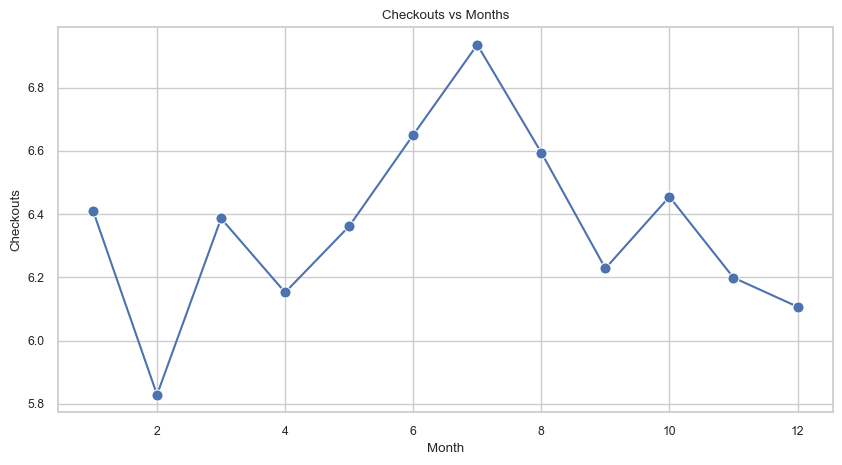

In [26]:
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid', font_scale=.8)
sns.lineplot(x= 'Checkout Month', y='Checkouts', data=library, ci=None, marker='o', markersize=8).set(title='Checkouts vs Months',xlabel='Month')
plt.show()

* It appears that books checkouts are high during the summer period in `June` `July` `August`.
* It appears that `July` is a seasonal month for books checkouts.

*****

#### 2. What is the most checked out subject throughout the years?

In [35]:
popular_subjects = library.groupby(['Subjects','Checkout Year'])['Checkouts'].sum().nlargest(10)

In [36]:
popular_subjects = popular_subjects.reset_index()

In [38]:
popular_subjects

,Subjects,Checkout Year,Checkouts
0,Womens Murder Club Imaginary organization Fiction,2008,1608
1,Womens Murder Club Imaginary organization Fiction,2009,1603
2,Cross Alex Fictitious character Fiction,2013,1527
3,Cross Alex Fictitious character Fiction,2010,1386
4,Womens Murder Club Imaginary organization Fiction,2012,1328
5,Womens Murder Club Imaginary organization Fiction,2011,1216
6,Cross Alex Fictitious character Fiction,2009,1196
7,Cross Alex Fictitious character Fiction,2012,1170
8,Cross Alex Fictitious character Fiction,2015,1119
9,Cross Alex Fictitious character Fiction,2014,1116


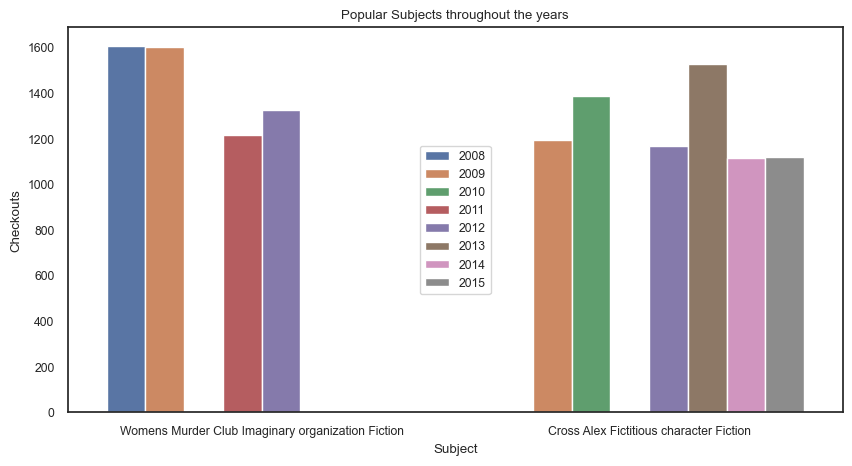

In [44]:
plt.figure(figsize=(10,5))
sns.set_theme(style='white', font_scale=.8)
sns.barplot(x='Subjects' ,y= 'Checkouts', data=popular_subjects, hue='Checkout Year').set(title='Popular Subjects throughout the years',xlabel='Subject')
plt.legend(loc='center')
plt.show()

* **`Womens Murder Club`** & **`Cross Alex`** fiction have been the most checked out subjects throughout the years.

*****

#### 3. What are the top 10 books that have been checked out?

In [55]:
top_books = library.groupby(['Title','Subjects'])['Checkouts'].sum().nlargest(20)

In [56]:
top_books = top_books.reset_index()

In [57]:
top_books

,Title,Subjects,Checkouts
0,The 6th Target,Womens Murder Club Imaginary organization Fiction,2003
1,NYPD Red 3,Police New York State New York Fiction,1896
2,7th Heaven,Womens Murder Club Imaginary organization Fiction,1845
3,The 8th Confession,Womens Murder Club Imaginary organization Fiction,1757
4,Honeymoon,Investment bankers Crimes against Fiction,1658
5,4th Of July,Womens Murder Club Imaginary organization Fiction,1642
6,Run For Your Life,Bennett Michael Fictitious character Fiction,1615
7,You've Been Warned,Nightmares Fiction,1586
8,Cross Country,Cross Alex Fictitious character Fiction,1475
9,Sundays At Tiffany's,Imaginary companions Fiction,1468


[Text(0.5, 1.0, 'Top 20 Checked out Books'), Text(0.5, 0, 'Title')]

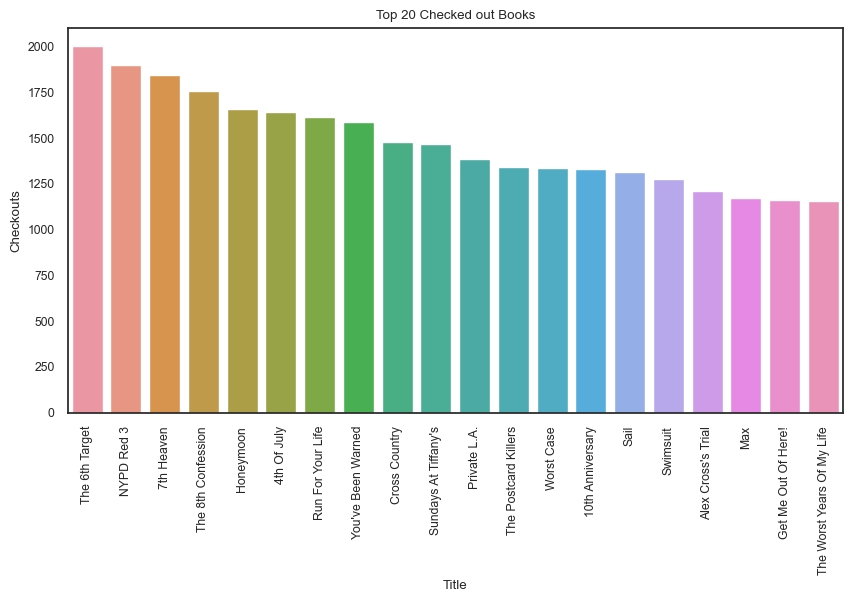

In [60]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.set_theme(style='white', font_scale=.8)
sns.barplot(x='Title' ,y='Checkouts', data=top_books).set(title='Top 20 Checked out Books',xlabel='Title')

****

#### 4. What are the most popular publication year?

In [66]:
popular_pub = library.groupby('Publication Year')['Checkouts'].sum().nlargest(20)

In [67]:
popular_pub = popular_pub.reset_index()

In [68]:
popular_pub

,Publication Year,Checkouts
0,2012,12929
1,2009,11096
2,2011,10776
3,2010,10295
4,2014,9630
5,2013,8753
6,2008,8567
7,2015,7158
8,2016,6520
9,2017,6493


[Text(0.5, 1.0, 'Last 20 Years of Publication'), Text(0.5, 0, 'Year')]

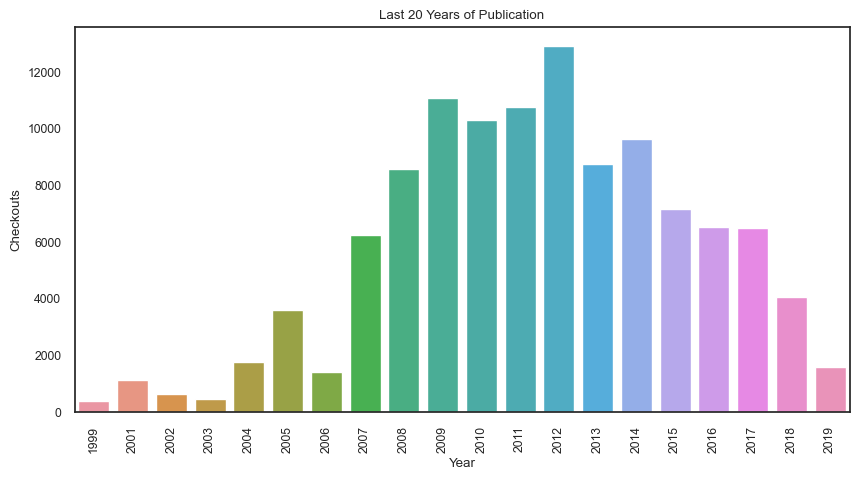

In [70]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.set_theme(style='white', font_scale=.8)
sns.barplot(x='Publication Year' ,y='Checkouts', data=popular_pub).set(title='Last 20 Years of Publication',xlabel='Year')

* The publications From 2009 to 2014 seem to be the most checked out.
* It seems that 2012 was a great year for publications since the most checked out books were from this year's production.

****